Libraries are imported

In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from langdetect import detect
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

The datasets are read

In [195]:
coursera_c = pd.read_csv('coursera_courses.csv')
coursera_r = pd.read_csv('coursera_reviews.csv')
edx_c = pd.read_csv('edx_courses.csv')
udemy_c = pd.read_csv('udemy_courses.csv')

Duplicates are checked

In [196]:
coursera_c[coursera_c.duplicated]

In [197]:
coursera_r[coursera_r.duplicated]

In [198]:
coursera_r.drop_duplicates(inplace=True)

In [199]:
edx_c[edx_c.duplicated]

In [200]:
edx_c.drop_duplicates(inplace=True)

In [201]:
udemy_c[udemy_c.duplicated]

In [202]:
udemy_c.drop_duplicates(inplace=True)

Missing values are checked

In [203]:
coursera_c.info()

In [204]:
coursera_r.info()
# The nulls found in this dataset are due to the fact that the person who was scoring did not want to write anything in the comments.

In [205]:
coursera_r['reviews'].fillna('No comments', inplace=True)

In [206]:
edx_c.info()

Various transformations have had to be made to this dataset to complete it, they are detailed below:
- Course_syllabus: it has been decided to remove the entire column since it has 50% nulls and the information it provides is not useful in terms of the report
- Summary, Course_description, subtitles y instructors: the missing values of these columns are due to the fact that they are extra data that can be present as not, therefore they were filled in clarifying the non-existence of the value
- n_enrolled: Finally, the rows that do not have enrolled students were removed. This is because this column cannot be filled with anything other than the correct value given its importance in the analysis. On the other hand, since there are no registered students, this may indicate that either it is a course that was left on standby or a course that has not started, therefore it should not be included in the report.

In [207]:
edx_c.drop('course_syllabus', axis=1, inplace=True)
edx_c['summary'].fillna('No summary', inplace=True)
edx_c['course_description'].fillna('No description', inplace=True)
edx_c['subtitles'].fillna('No subtitles', inplace=True)
edx_c['instructors'].fillna('No especified instructor', inplace=True)
edx_c.dropna(inplace=True)

Columns that are considered not necessary for the analysis, such as URLs, are then removed.

In [208]:
coursera_c.drop(['course_url', 'institution'], axis=1, inplace=True)
coursera_r.drop(['reviewers', 'reviews'], axis=1, inplace=True)
udemy_c.drop(['course_id','url','is_paid'], axis=1, inplace=True)
edx_c.drop(['summary','institution','instructors','subtitles','course_effort', 'course_description','course_url'], axis=1, inplace=True)

Transformations are made to certain columns for better analysis

First the edx dataset is transformed

In [209]:
edx_c['extra'], edx_c['price']= edx_c['price'].str.split('$',1).str
edx_c['price'], edx_c['extra1']= edx_c['price'].str.split(' ',1).str
edx_c.drop(['extra', 'extra1'], axis=1, inplace=True)
edx_c['Length[Weeks]'], edx_c['extra']=edx_c['course_length'].str.split(' ',1).str
edx_c.drop(['extra', 'course_length'], axis=1, inplace=True)

# Se modifican los titulos
edx_c.rename({'title': 'Title', 'n_enrolled':'Enrolled','course_type':'Course_Type','subject':'Subject','language':'Language', 'price':'Price[USD]'}, axis=1, inplace=True)

Those of Coursera will be unified

In [210]:
coursera_r = coursera_r.groupby(['course_id']).mean()
coursera = coursera_c.merge(coursera_r, on='course_id', how='left')
coursera.drop('course_id', axis=1, inplace=True)

# Titles are changed
coursera.rename({'name':'Title', 'rating': 'Rating'}, axis=1, inplace=True)

In [211]:
coursera['Language'] = coursera['Title'].apply(detect)

In [357]:
coursera['Language'].replace({'en':'English','ca':'English','lt':'English','af':'English','da':'English','id':'English','tl':'English','nl':'English','no':'English','ru':'Russian','Polish':'English','German':'English','Italian':'English', 'es':'Spanish', 'de':'German','pt':'Portuguese','fr':'French','it':'Italian','ro':'Romanian','pl':'Polish','ko':'Korean'}, inplace=True)

Finally those of Udemy

In [212]:
udemy_c['Published_Date'], udemy_c['extra']= udemy_c['published_timestamp'].str.split('T',1).str
udemy_c.drop(['extra','published_timestamp'], axis=1, inplace=True)

C:\Users\crist\AppData\Local\Temp\ipykernel_5784\4070117757.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  udemy_c['Published_Date'], udemy_c['extra']= udemy_c['published_timestamp'].str.split('T',1).str
C:\Users\crist\AppData\Local\Temp\ipykernel_5784\4070117757.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  udemy_c['Published_Date'], udemy_c['extra']= udemy_c['published_timestamp'].str.split('T',1).str


In [213]:
# Titles are changed
udemy_c.rename({'course_title': 'Title', 'price':'Price[USD]', 'num_subscribers': 'Enrolled','num_subscribers':'Subscribers','num_reviews':'Reviews','num_lectures':'Lectures', 'level': 'Level','content_duration':'Length[Weeks]', 'subject':'Subject'}, axis=1, inplace=True)

In [214]:
udemy_c['Language']=udemy_c['Title'].apply(detect)

In [295]:
udemy_c['Language'].replace({'en':'English', 'es':'Spanish', 'de':'German', 'ar':'Arabic', 'ja':'Japanese','pt':'Portuguese','th':'Thai','fr':'French','ru':'Russian','zh-cn':'Chinese','it':'Italian','et':'Estonian','ro':'Romanian','tr':'Turkish','pl':'Polish','ko':'Korean'}, inplace=True)

In [334]:
udemy_c['Language'][[19,58,93,99,103,108,112,129,140,229,267,296,308,309,319,322,337,348,359,363,364,388,395,410,418,424,429,438,446,453,466,471,478,479,519,544,547,558,581,604,617,618,641,650,658,660,681,687,717,718,734,766,782,808,811,818,820,822,831,835,836,846,852,933,938,964,972,973,974,980,1020,1066,1067,1068,1165,1217,1228,1295,1297,1326,1345,1406,1411,1417,1436,1438,1445,1479,1499,1531,1562,1579,1635,1644,1646,1657,1681,1685,1687,1698,1703,1743,1751,1752,1762,1764,1790,1800,1806,1819,1823,1830,1845,1861,1868,1877,1883,1889,1901,1905,1916,1922,1931,1957,1976,1983,1985,2008,2029,2047,2062,2067,2071,2077,2088,2091,2092,2108,2112,2118,2163,2168,2177,2215,2225,2239,2267,2268,2281,2287,2303,2314,2342,2378,2381,2419,2410,2432,2450,2456,2472,2505,2512,2522,2525,2576,2592,2601,2612,2628,2647,2645,2670,2676,2685,2708,2724,2726,2749,2780,2795,2829,2855,2867,2885,2921,2945,2954,2955,2969,2983,2985,2986,3013,3040,3045,3048,3095,3098,3142,3144,3161,3165,3171,3234,3244,3255,3260,3270,3285,3305,3307,3324,3332,3337,3360,3362,3385,3424,3455,3495,3511,3544,3564,3589,3657,3666]]='English'
udemy_c['Language'][[671,1041,1258,1259,1260,1465,1466,1471,1501,1627,2138,2251,2253]]='Spanish'
udemy_c['Language'][[1320]]='Chinese'
udemy_c['Language'][[1667]]='Japanese'
udemy_c['Language'][[1726]]='Portuguese'

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  udemy_c['Language'][[1667]]='Japanese'
C:\Users\crist\AppData\Local\Temp\ipykernel_5784\746476905.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  udemy_c['Language'][[1726]]='Portuguese'


All DataFrames are converted back to csv to work on a Dashboard

In [361]:
coursera.to_csv('Coursera_proc.csv')
edx_c.to_csv('edx_courses_proc.csv')
udemy_c.to_csv('udemy_courses_proc.csv')

WordClouds are generated

Coursera

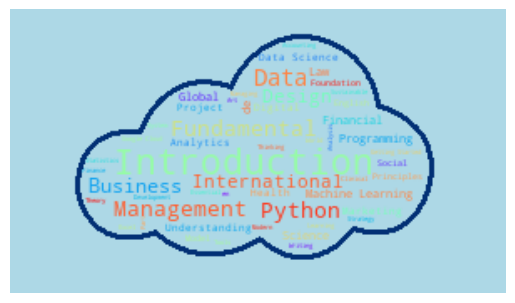

In [404]:
stopwords = set(STOPWORDS)
mask = np.array(Image.open("wordcloud_images/download1.png"))
wordcloud = WordCloud(stopwords=stopwords,background_color='lightblue', max_words=100, mask=mask,contour_color='#023075',contour_width=3,colormap='rainbow').generate(' '.join(coursera['Title']))
# create image as cloud
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("coursera_wc.png", format="png")
plt.show()

Udemy

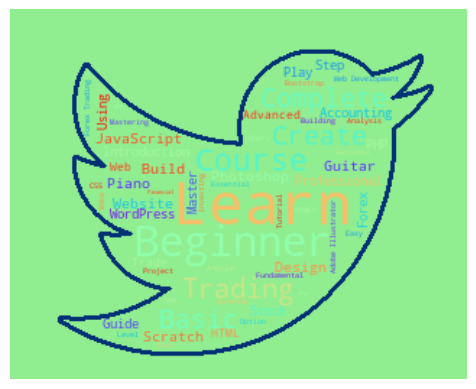

In [405]:
stopwords = set(STOPWORDS)
mask = np.array(Image.open("wordcloud_images/twitter.png"))
wordcloud = WordCloud(stopwords=stopwords,background_color='lightgreen', max_words=100, mask=mask,contour_color='#023075',contour_width=3,colormap='rainbow').generate(' '.join(udemy_c['Title']))
# create image as cloud
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("udemy_wc.png", format="png")
plt.show()

EDX

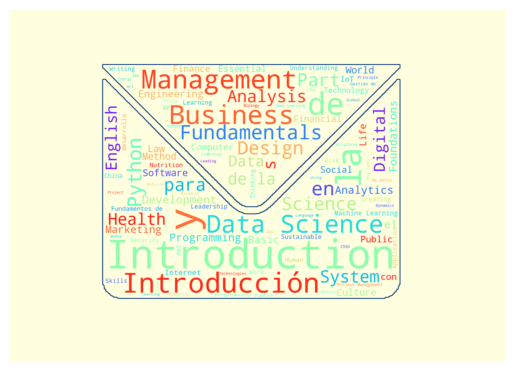

In [414]:
stopwords = set(STOPWORDS)
mask = np.array(Image.open("wordcloud_images/email_mask.png"))
wordcloud = WordCloud(stopwords=stopwords,background_color='lightyellow', max_words=100, mask=mask,contour_color='#023075',contour_width=3,colormap='rainbow').generate(' '.join(edx_c['Title']))
# create image as cloud
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("edx_wc.png", format="png")
plt.show()